In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/JohnsonJohnson.csv")
df["year"] = df["index"].apply(lambda x: x.split()[0])
df["q"] = df["index"].apply(lambda x: x.split()[1])
df = df.drop("index", axis=1)
df

,value,year,q
0,0.71,1960,Q1
1,0.63,1960,Q2
2,0.85,1960,Q3
3,0.44,1960,Q4
4,0.61,1961,Q1
...,...,...,...
79,9.99,1979,Q4
80,16.20,1980,Q1
81,14.67,1980,Q2
82,16.02,1980,Q3


In [3]:
import numpy as np

In [4]:
df["time"] = np.arange(df.shape[0])

In [5]:
df

,value,year,q,time
0,0.71,1960,Q1,0
1,0.63,1960,Q2,1
2,0.85,1960,Q3,2
3,0.44,1960,Q4,3
4,0.61,1961,Q1,4
...,...,...,...,...
79,9.99,1979,Q4,79
80,16.20,1980,Q1,80
81,14.67,1980,Q2,81
82,16.02,1980,Q3,82


In [6]:
import matplotlib.pyplot as plt

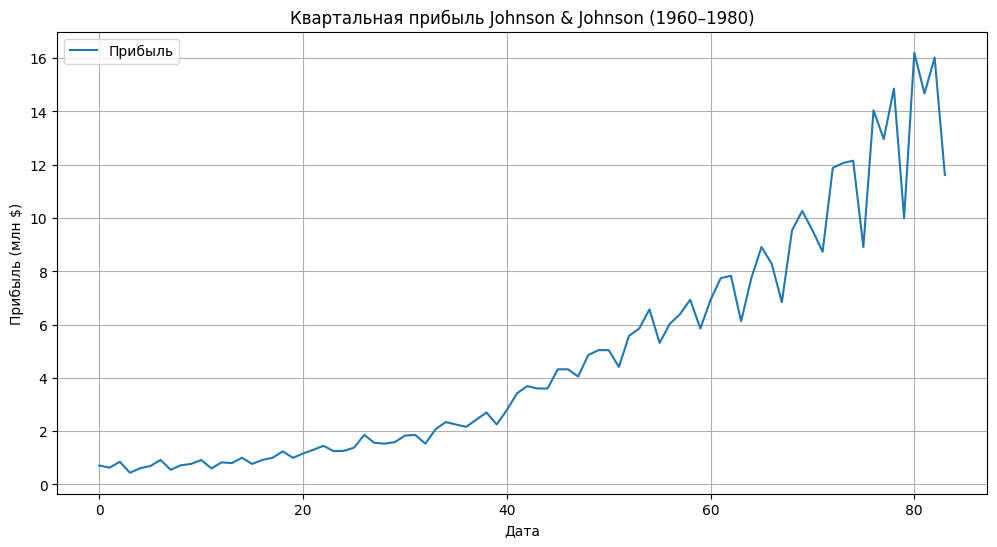

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["value"], label="Прибыль")
plt.title("Квартальная прибыль Johnson & Johnson (1960–1980)")
plt.xlabel("Дата")
plt.ylabel("Прибыль (млн $)")
plt.grid(True)
plt.legend()
plt.show()

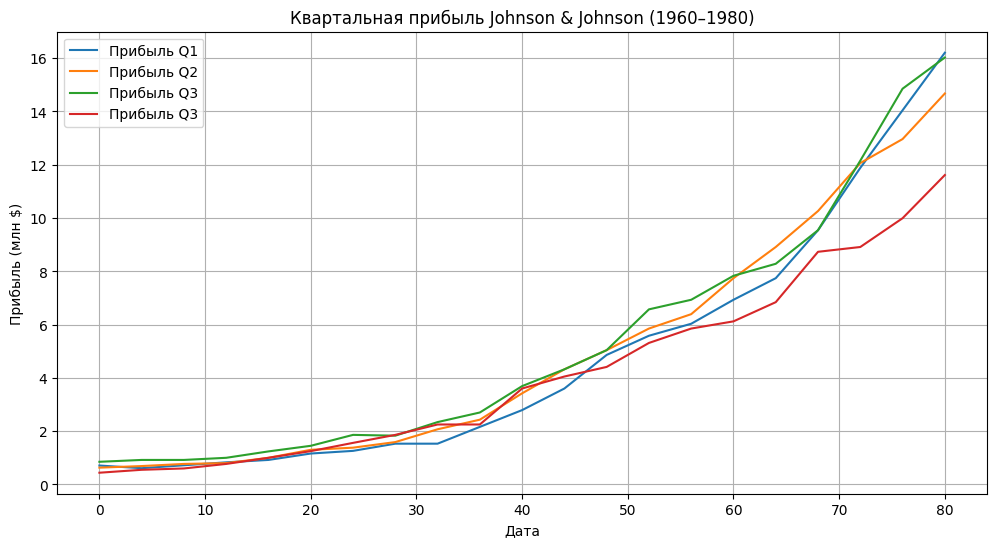

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[::4], df.query("q == 'Q1'")["value"], label="Прибыль Q1")
plt.plot(df.index[::4], df.query("q == 'Q2'")["value"], label="Прибыль Q2")
plt.plot(df.index[::4], df.query("q == 'Q3'")["value"], label="Прибыль Q3")
plt.plot(df.index[::4], df.query("q == 'Q4'")["value"], label="Прибыль Q3")
plt.title("Квартальная прибыль Johnson & Johnson (1960–1980)")
plt.xlabel("Дата")
plt.ylabel("Прибыль (млн $)")
plt.grid(True)
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
df["q"] = df["q"].apply(lambda x: int(x[-1]))
quarters = df["q"].unique()
quarter_coefs = {}

for q in quarters:
    subset = df[df["q"] == q]
    X = subset[["time"]]
    y = subset["value"]

    model = LinearRegression()
    model.fit(X, y)
    quarter_coefs[q] = {"coef": model.coef_[0], "intercept": model.intercept_}

model_all = LinearRegression()
for q in sorted(quarter_coefs):
    print(f"Q{q}: {quarter_coefs[q]['coef']:.4f}")
model_all.fit(df[["time"]], df["value"])

Q1: 0.1737
Q2: 0.1713
Q3: 0.1761
Q4: 0.1337


LinearRegression()

In [10]:
for q in sorted(quarter_coefs):
    print(f"{q=}: {quarter_coefs[q]['coef']}")

q=np.int64(1): 0.1737402597402597
q=np.int64(2): 0.1713246753246753
q=np.int64(3): 0.17608766233766227
q=np.int64(4): 0.1337272727272727


In [12]:
years_since_1960 = 2016 - 1960
time_2016 = df["time"].max() + years_since_1960 * 4 + np.array([1, 2, 3, 4])

predictions = {}
for q in quarters:
    coef = quarter_coefs[q]["coef"]
    intercept = quarter_coefs[q]["intercept"]
    predictions[f"Q{q}"] = coef * time_2016[q - 1] + intercept

np.mean(list(predictions.values()))

np.float64(48.67671320346319)

In [14]:
for q, profit in predictions.items():
    print(f"{q=}: {profit=}")

q='Q1': profit=np.float64(51.35381818181817)
q='Q2': profit=np.float64(50.88072727272727)
q='Q3': profit=np.float64(52.44530303030301)
q='Q4': profit=np.float64(40.02700432900432)
